In [1]:
from canvas import Canvas
from policy import PolicyIteration

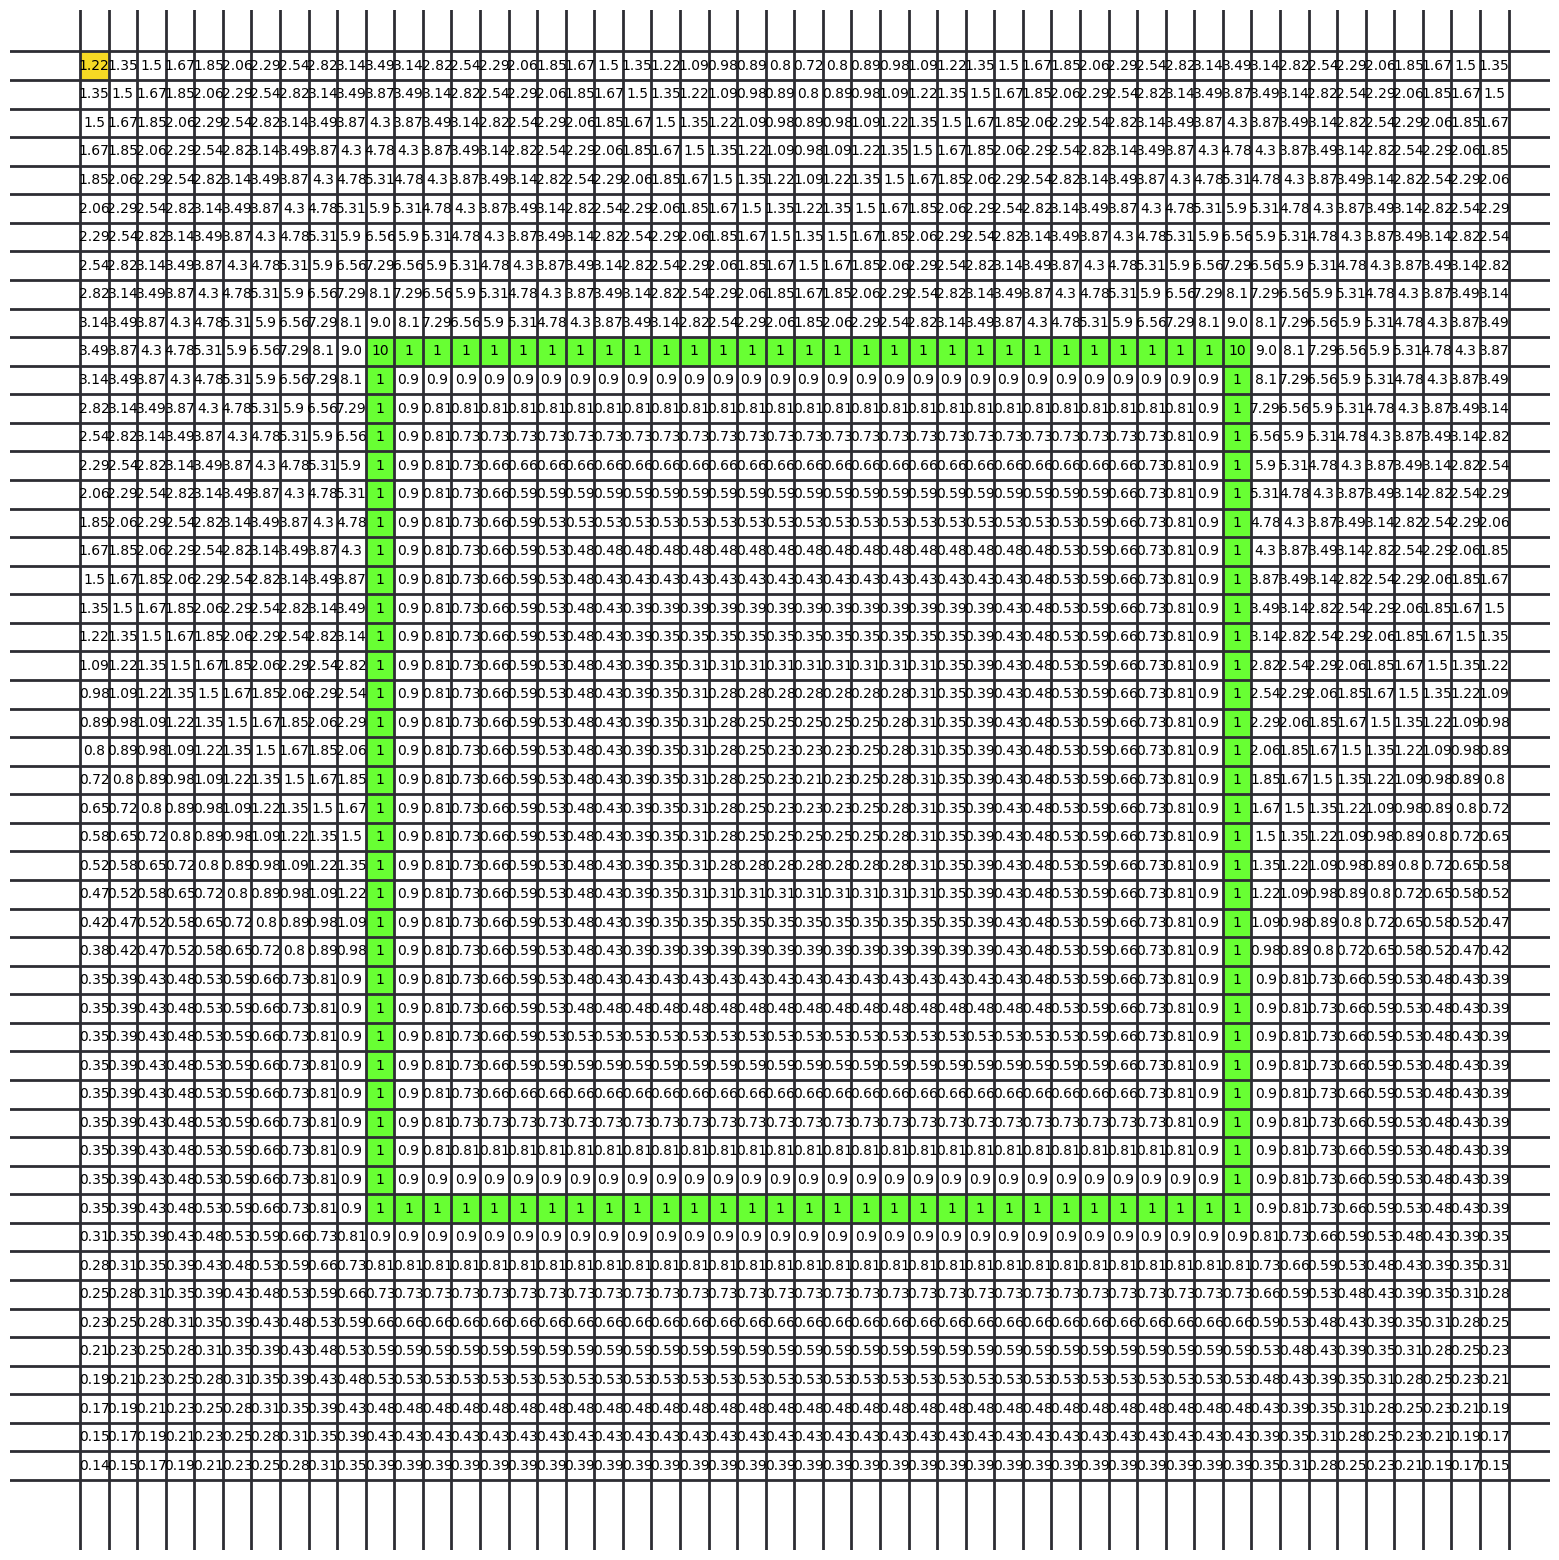

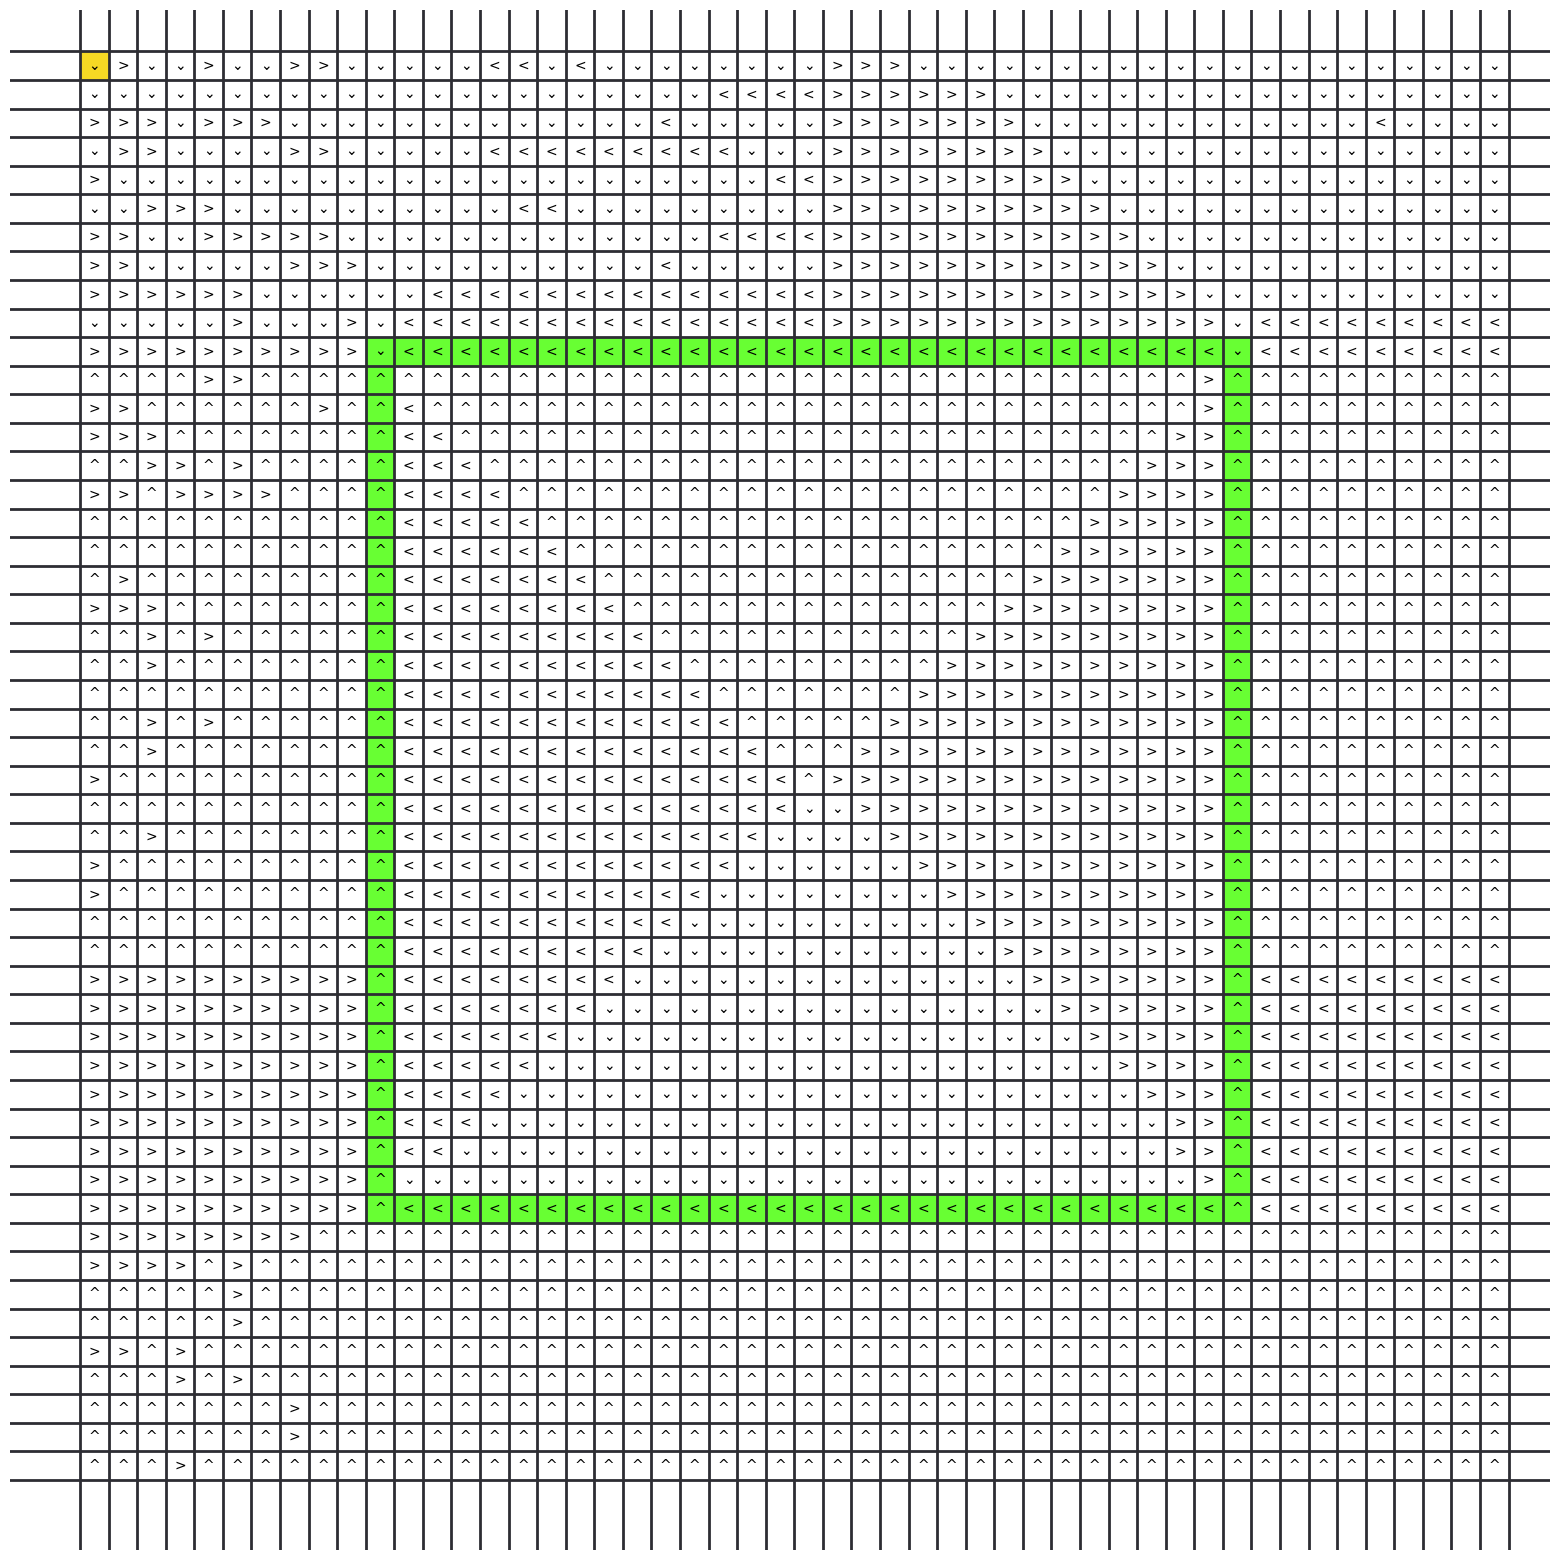

In [2]:
rows, columns = 50, 50

# Inicializo el tablero con todas las recompensas en cero
board = [[' ' for _ in range(columns)] for _ in range(rows)]

# Defino las recompensas de acuerdo a la figura que queremos dibujar.
for i in range(rows):
    for j in range(columns):
        if i == 10 and j >= 10 and j <= 40:
            board[i][j] = '1'
        if i == 40 and j >= 10 and j <= 40:
            board[i][j] = '1'
        if j == 40 and i >= 10 and i <= 40:
            board[i][j] = '1'
        if j == 10 and i >= 10 and i <= 40:
            board[i][j] = '1'

board[10][10] = '10'
board[10][40] = '10'

board[0][0] = 'S'
env = Canvas(board)

# Creación del agente
agent = PolicyIteration(env)
agent.policy_iteration()
vals = agent.values
env.plot()
env.plot_policy(agent.policy)

In [3]:
iterations = 100
state = (0, 0)
agent.mdp.initial_state = state
agent.mdp.state = state
pivot_state = state
steps = 10

def run_down():
    print(f'_turtle.right(180)')
    print(f'_turtle.forward({steps})')
    print(f'_turtle.left(180)')

def run_up():
    print(f'_turtle.forward({steps})')

def run_left():
    print(f'_turtle.left(90)')
    print(f'_turtle.forward({steps})')
    print(f'_turtle.right(90)')

def run_right():
    print(f'_turtle.right(90)')
    print(f'_turtle.forward({steps})')
    print(f'_turtle.left(90)')

for iteration in range(iterations):
    policy = agent.policy[pivot_state[0]][pivot_state[0]]
    
    if policy == 'down':
        run_down()
    if policy == 'up':
        run_up()
    if policy == 'left':
        run_left()
    if policy == 'right':
        run_right()
    print()

    agent.mdp.do_action(policy)
    pivot_state = agent.mdp.state

_turtle.right(180)
_turtle.forward(10)
_turtle.left(180)

_turtle.right(180)
_turtle.forward(10)
_turtle.left(180)

_turtle.right(90)
_turtle.forward(10)
_turtle.left(90)

_turtle.right(90)
_turtle.forward(10)
_turtle.left(90)

_turtle.right(90)
_turtle.forward(10)
_turtle.left(90)

_turtle.right(90)
_turtle.forward(10)
_turtle.left(90)

_turtle.right(90)
_turtle.forward(10)
_turtle.left(90)

_turtle.right(90)
_turtle.forward(10)
_turtle.left(90)

_turtle.right(90)
_turtle.forward(10)
_turtle.left(90)

_turtle.right(90)
_turtle.forward(10)
_turtle.left(90)

_turtle.right(90)
_turtle.forward(10)
_turtle.left(90)

_turtle.right(90)
_turtle.forward(10)
_turtle.left(90)

_turtle.right(90)
_turtle.forward(10)
_turtle.left(90)

_turtle.right(90)
_turtle.forward(10)
_turtle.left(90)

_turtle.right(90)
_turtle.forward(10)
_turtle.left(90)

_turtle.right(90)
_turtle.forward(10)
_turtle.left(90)

_turtle.right(90)
_turtle.forward(10)
_turtle.left(90)

_turtle.right(90)
_turtle.forward(10)
_turtl